### Import the data and clear NaN/null data

In [7]:
import pandas as pd
import os

all_months_data = pd.DataFrame()

files = [file for file in os.listdir("C://Users//BAGUS//Pandas-Data-Science-Tasks-master//SalesAnalysis//Sales_Data/")]
for file in files:
    df = pd.read_csv("C://Users//BAGUS//Pandas-Data-Science-Tasks-master//SalesAnalysis//Sales_Data/"+file)    
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_year_data.csv", index=False)
all_year_data = pd.read_csv("all_year_data.csv")
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
nan_df = all_year_data[all_year_data.isna().any(axis=1)] #see how much NaN column
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
all_year_data = all_year_data.dropna() #get rid of NaN data
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Question 1: what month is best in term of sales number?

In [10]:
all_year_data['months'] = all_year_data['Order Date'].str[0:2] #get months from order date column
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
all_year_data['months'] = all_year_data['months'].astype('int32') #change months to integer

ValueError: invalid literal for int() with base 10: 'Or'

In [11]:
all_year_data = all_year_data[ all_year_data['Order Date'].str[0:2] != 'Or'] #get rid of duplicate

In [12]:
all_year_data['months'] = all_year_data['Order Date'].str[0:2]
all_year_data['months'] = all_year_data['months'].astype('int32')
all_year_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [23]:
all_year_data['sales'] = all_year_data['Quantity Ordered'] * all_year_data['Price Each']
all_year_data.head()

TypeError: can't multiply sequence by non-int of type 'str'

In [13]:
all_year_data['Quantity Ordered'] = pd.to_numeric(all_year_data['Quantity Ordered']) #change data to numeric/int
all_year_data['Price Each'] = pd.to_numeric(all_year_data['Price Each'])
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [14]:
all_year_data['sales'] = all_year_data['Quantity Ordered'] * all_year_data['Price Each']
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [6]:
sales = all_year_data.groupby('months').sum() 

KeyError: 'months'

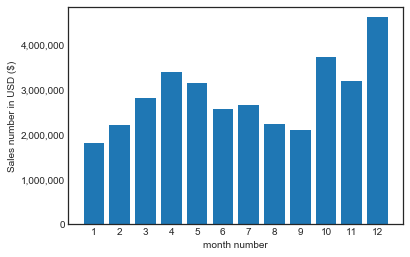

In [134]:
import matplotlib.pyplot as plt

months = range(1,13)
fig, ax1 = plt.subplots()
plt.bar(months, sales['sales'] )
plt.xticks(months)
plt.ylabel('Sales number in USD ($)')
plt.xlabel('month number')
ax1.get_yaxis().set_major_formatter(
tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

### Question 2: what city is best for sales?

In [19]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_year_data['city'] = all_year_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x)) #create city columns from purchase address
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [20]:
result = all_year_data.groupby('city').sum() 
result

,Quantity Ordered,Price Each,months,sales
city,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


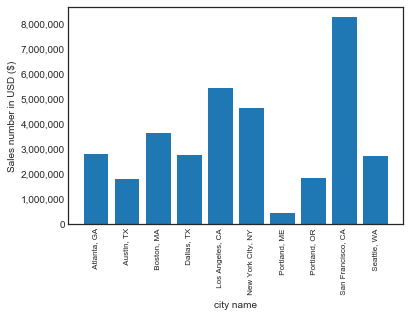

In [133]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_year_data.groupby('city')] #make city and sales is in order

fig, ax1 = plt.subplots()
plt.bar(cities, result['sales'] )
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales number in USD ($)')
plt.xlabel('city name')
ax1.get_yaxis().set_major_formatter(
tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### Question 3: what time should we display ads to maximize likelihood of customers buying product?

In [21]:
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [22]:
all_year_data['Order Date'] = pd.to_datetime(all_year_data['Order Date']) #change format to date and time

In [25]:
all_year_data['hour'] = all_year_data['Order Date'].dt.hour
all_year_data['minute'] = all_year_data['Order Date'].dt.minute
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


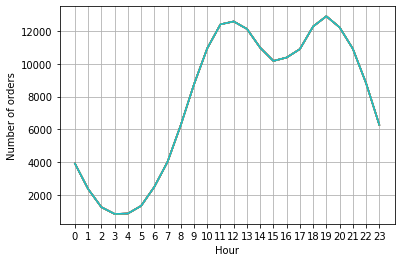

In [31]:
hours = [hour for hour, df in all_year_data.groupby('hour')]

plt.plot(hours, all_year_data.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

#recommendation for ads is around 14-16

### Question 4: what product often sold together?

In [41]:
duplicate = all_year_data[all_year_data['Order ID'].duplicated(keep=False)] #see what item is duplicated
duplicate['grouped'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #join duplicated item in 1 column
duplicate = duplicate[['Order ID', 'grouped']].drop_duplicates() #drop duplicated column
duplicate.head()

C:\Users\BAGUS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [52]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in duplicate['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: what product sold the most? why do you think it is?

In [53]:
all_year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


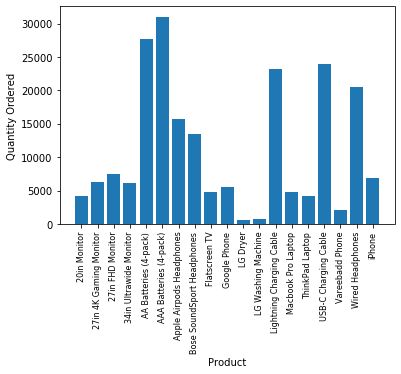

In [60]:
product_group = all_year_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

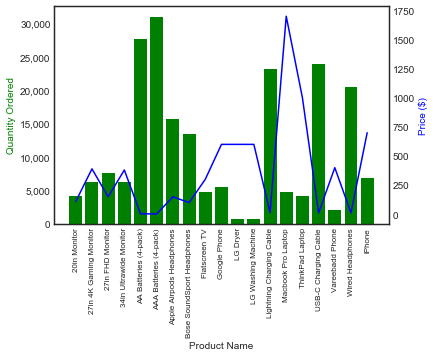

In [120]:
prices = all_year_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(products, prices, 'b-')
ax1.bar(products, quantity_ordered, color='g')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.get_yaxis().set_major_formatter(
tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### Question 6: which product have the most revenue?

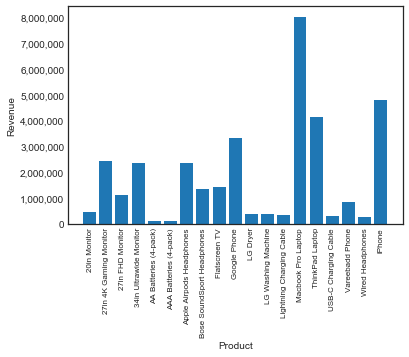

In [131]:
revenue = all_year_data.groupby('Product').sum()['sales']

products = [product for product, df in product_group]

fig, ax1 = plt.subplots()
plt.bar(products, revenue)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Revenue')
ax1.get_yaxis().set_major_formatter(
tkr.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()



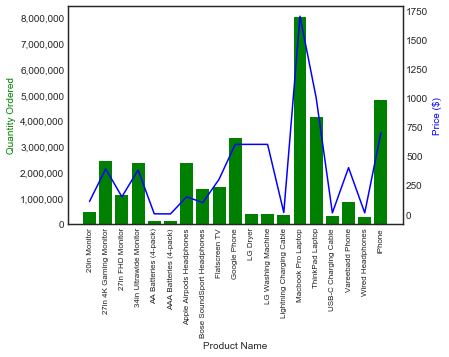

In [123]:
import matplotlib.ticker as tkr

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(products, prices, 'b-')
ax1.bar(products, revenue, color='g')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.get_yaxis().set_major_formatter(
tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [132]:
total_revenue = all_year_data['sales'].sum().astype('int32')
print("total revenue =", f"{total_revenue:,d}", "$")

total revenue = 34,492,035 $
